In [1]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Importamos las librerías necesarias para el análisis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import imageio
from IPython.display import Image

# Generamos un conjunto de datos sintéticos con 300 muestras, distribuidas en 4 "blobs" o agrupaciones.
X, y_true = make_blobs(n_samples=1500, centers=10, cluster_std=0.60, random_state=0)


In [23]:

# Preparamos una lista para almacenar las imágenes generadas en cada iteración
images = []

# Ejecutamos el algoritmo K-means varias veces, cada vez con un número de iteraciones incremental.
# Con cada iteración, capturamos la posición de los centroides y las asignaciones de los puntos.
for i in range(1, 21):
    # Creamos una instancia de KMeans con un número fijo de 4 clusters, con una inicialización aleatoria
    # y especificamos el número de iteraciones para la convergencia del algoritmo.
    kmeans = KMeans(n_clusters=2, init='random', n_init=1, max_iter=i, random_state=0)
    kmeans.fit(X)  # Ajustamos el modelo a los datos generados

    # Creamos una figura para visualizar los clusters
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'Iteration {i}', fontsize=16)
    # Dibujamos los puntos de datos y los centroides de cada cluster
    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=30, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', alpha=0.75)
    # Eliminamos las marcas de escala para una mejor visualización
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Guardamos cada figura como una imagen PNG
    filename = f'kmeans_{i}.png'
    fig.savefig(filename)
    plt.close(fig)  
    images.append(imageio.imread(filename))  # Añadimos la imagen a la lista para el GIF




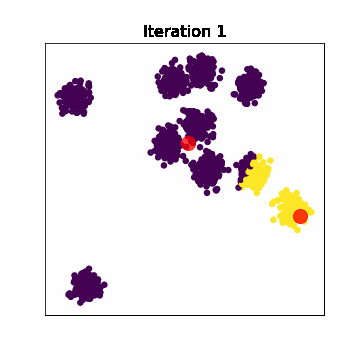

In [24]:
# Usamos imageio para compilar las imágenes guardadas en un GIF animado
imageio.mimsave('kmeans_iterations.gif', images, fps=1)

# Mostramos el GIF resultante en el Jupyter Notebook para visualización interactiva
Image(filename='kmeans_iterations.gif')